# Dog/Cat Classifier using CNN

**Scenario**: We use 10,000 dog and cat pictures from the full dataset of 25,000 dog and cat pictures split evenly from the [Kaggle Dogs vs. Cats](https://www.kaggle.com/competitions/dogs-vs-cats/data) competition data.

For the purpose of manageably uploading all project files to GitHub and implementing this model, we reduce our dataset size to 200 random dog and cat pictures with a 70/30 split:
- Training set: 70 dogs and 70 cats
- Test set: 60 random dog and cat pictures

On our local machine, we test 10,000 random dog and cat pictures with a 80/20 split:
- Training set: 4,000 dogs and 4,000 cats
- Test set: 2,000 random dog and cat pictures

For both, we will explore 10 single predictions.

**Goal**: Using the convolutional neural network model (CNN), classify a new image as either a dog or a cat.

**Results**: 

We tested 10 single predictions after building and training the CNN model on the abridged dataset of 200 images. Out of the 10, three were misclassified. 

Performing the analysis using the full dataset, three were also misclassified although the third image misclassified was not the same. It does appear that increasing the training set size improved the results by decreasing the loss and increasing the accuracy.

| Training Size | Test Size | Misclassified | Loss | Accuracy
| :--: | :--: | :--: | :--: | :--: |
| 140 | 60 | 1, 2, 3 | 0.4057 | 0.8357 |
| 8,000 | 2,000 |  1, 2, 5 | 0.2578 | 0.8928 |

Both models misclassified the cat images 1 and 2 as dogs. These are shown below.

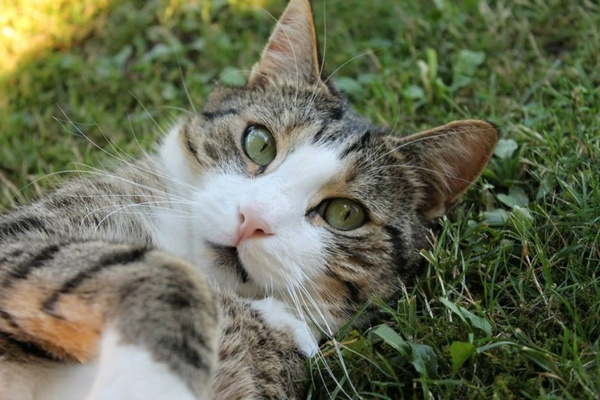

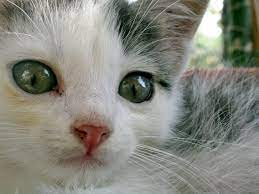

In [3]:
from IPython.display import Image, display
display(Image(filename="./dataset/single_prediction/cat_or_dog_1.jpeg", width=200))
display(Image(filename="./dataset/single_prediction/cat_or_dog_2.jpeg", width=200))

### Importing the libraries

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image

In [4]:
tf.__version__

'2.13.0'

## Part 1 - Data Preprocessing

We set `use_full_set` to `False` to analyze our abridged dataset of 140 training images and 60 test images. On our local machine, we can set `use_full_set` to `True` to use 8,000 training images and 2,000 test images. 

In [5]:
use_full_set = False

if use_full_set == True:
    data_path = "config/dataset"
else:
    data_path = "dataset"

### Preprocessing the Training set

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(f'{data_path}/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(f'{data_path}/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [8]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [12]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [13]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [14]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [15]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [16]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 71s 282ms/step - loss: 0.6723 - accuracy: 0.5940 - val_loss: 0.6422 - val_accuracy: 0.6350
Epoch 2/25
250/250 [==============================] - 45s 181ms/step - loss: 0.6252 - accuracy: 0.6492 - val_loss: 0.5815 - val_accuracy: 0.7095
Epoch 3/25
250/250 [==============================] - 45s 179ms/step - loss: 0.5775 - accuracy: 0.6973 - val_loss: 0.5809 - val_accuracy: 0.7015
Epoch 4/25
250/250 [==============================] - 45s 182ms/step - loss: 0.5571 - accuracy: 0.7106 - val_loss: 0.5947 - val_accuracy: 0.6850
Epoch 5/25
250/250 [==============================] - 46s 183ms/step - loss: 0.5347 - accuracy: 0.7321 - val_loss: 0.5226 - val_accuracy: 0.7440
Epoch 6/25
250/250 [==============================] - 45s 181ms/step - loss: 0.5207 - accuracy: 0.7379 - val_loss: 0.5155 - val_accuracy: 0.7540
Epoch 7/25
250/250 [==============================] - 45s 180ms/step - loss: 0.4983 - accuracy: 0.7531 - val_loss: 0.5434 - val_ac

## Part 4 - Making a single prediction

### Using the abridged dataset

In [42]:
# Change number between 1-10 to test different predictions
img_num = 2
img_path = f'{data_path}/single_prediction/cat_or_dog_{img_num}.jpeg'
test_image = image.load_img(img_path, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image/255.0)
training_set.class_indices
if result[0][0] > 0.5:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 15ms/step


dog


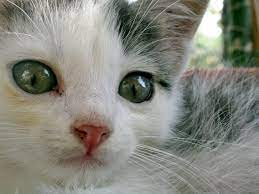

In [43]:
print(prediction)
display(Image(filename=img_path))

Summary of single predictions using the abridged dataset:

| Image | Predicted | Actual
| :--: | :-- | :-- |
| 1 | Dog | Cat |
| 2 | Dog | Cat |
| 3 | Dog | Cat |
| 4 | Cat | Cat |
| 5 | Cat | Cat |
| 6 | Dog | Dog |
| 7 | Dog | Dog |
| 8 | Dog | Dog |
| 9 | Dog | Dog |
| 10 | Dog | Dog |

Out of a small sample of 10 single predictions, the first three images (1, 2, and 3) were misclassified. For all three, the actual image contained cats but were all inaccurately predicted to be dogs.

### Using the full dataset

Summary of single predictions using the full dataset:

| Image | Predicted | Actual
| :--: | :-- | :-- |
| 1 | Dog | Cat |
| 2 | Dog | Cat |
| 3 | Cat | Cat |
| 4 | Cat | Cat |
| 5 | Dog | Cat |
| 6 | Dog | Dog |
| 7 | Dog | Dog |
| 8 | Dog | Dog |
| 9 | Dog | Dog |
| 10 | Dog | Dog |

Three images were misclassified: 1, 2, and 5. More training examples led to lower loss and higher accuracy. However, for the 10 single predictions chosen, using the full dataset still got the same number of images classified correctly.

Below is the output using the full dataset.

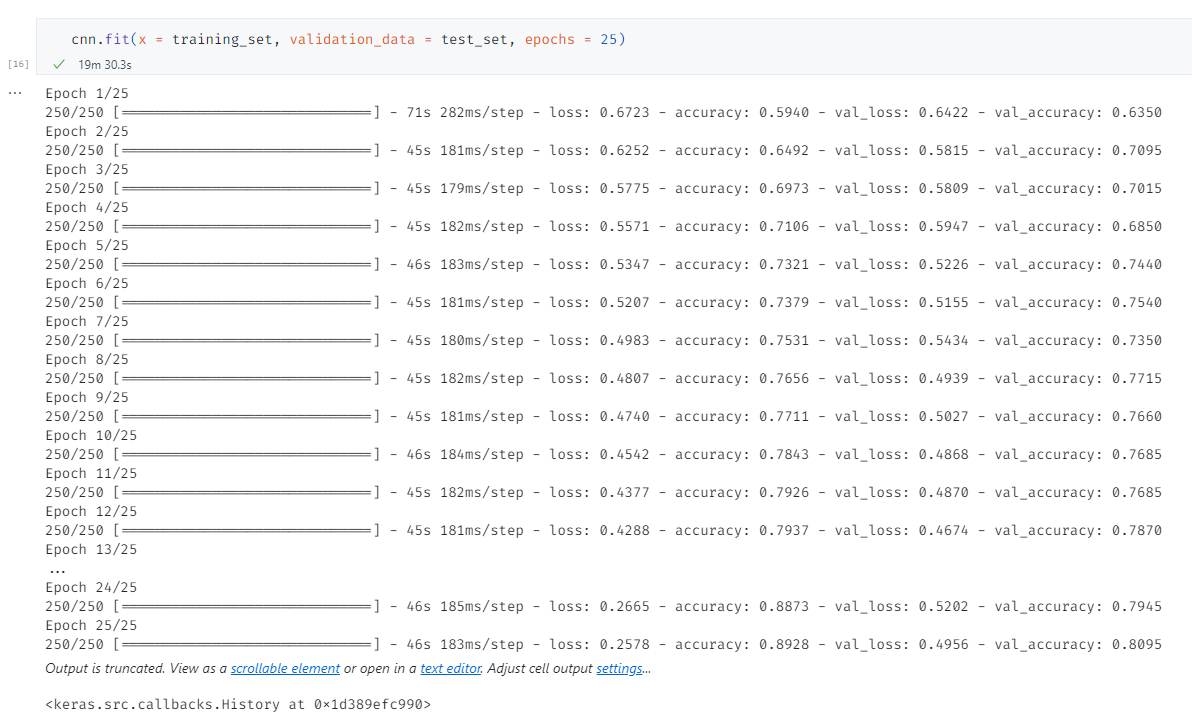

In [4]:
display(Image(filename="output_full_dataset.png"))